<a href="https://colab.research.google.com/github/vinitsinha20/Introduction-to-Deep-Learning-and-its-Applications/blob/main/Introduction-to-Deep-Learning-and-its-Applications/Assignment/Assignment_3/201122_VinitSinha.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [9]:
import torch
import torchvision
import numpy as np
import torch.nn as nn
import matplotlib.pyplot as plt
batch_size = 128
layers = 2
hid_size = 128
classes = 10
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [10]:
Data = torchvision.datasets.MNIST('root/', download=True, train=True, transform=torchvision.transforms.ToTensor())
Test = torchvision.datasets.MNIST('root/', train=False, transform=torchvision.transforms.ToTensor(), download=True)

Label: 7


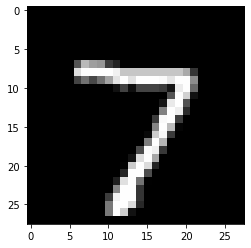

In [11]:
plt.imshow(Test[0][0][0],cmap='gray')
print('Label:', Test[0][1])

In [12]:
class RNN(nn.Module):
  def __init__(self):
    super(RNN,self).__init__()
    self.num_layers = layers
    self.hidden_size = hid_size
    self.lstm = nn.LSTM(28,hid_size, layers, batch_first = True)
    self.lin = nn.Linear(hid_size, classes)
  def forward(self, x):
    res,_ = self.lstm(x)
    res = res[:,-1,:]
    res=self.lin(res)
    return res

In [13]:
from torch.utils.data import DataLoader
train_set = DataLoader(dataset = Data, batch_size = batch_size, shuffle = True)
test_set = DataLoader(dataset = Test, batch_size = batch_size)

In [14]:
Digits = RNN()
Digits = Digits.to(device)
Optim = torch.optim.Adam(Digits.parameters(), lr= 0.00017) 
loss_fn = nn.CrossEntropyLoss()
list1 = []
list2 = []
for epoch in range(11):
  with torch.no_grad():
    for dig, lab in test_set:
      dig = dig.reshape(-1, 28, 28).to(device)
      result = Digits(dig)
      lab = lab.to(device)
      loss = loss_fn(result, lab)
      print("Epoch - " + str(epoch) +", Loss_test - " + str(loss.item()), end = ' ' )
      _, pred = torch.max(result.data, dim=1)
      n = (pred==lab).sum().item()
      list1.append((1.0*n)/batch_size)
      break
  for i, (dig, lab) in enumerate(train_set):
    dig = dig.reshape(-1, 28, 28).to(device)
    result = Digits(dig)
    lab = lab.to(device)
    loss = loss_fn(result, lab)
    Optim.zero_grad()
    loss.backward()
    Optim.step()
    if i == 0:
      result = Digits(dig)
      loss = loss_fn(result, lab)
      print(", Loss_train - " + str(loss.item()))
      _, pred = torch.max(result.data, dim=1)
      n = (pred==lab).sum().item()
      list2.append((1.0*n)/batch_size)


Epoch - 0, Loss_test - 2.3023793697357178 , Loss_train - 2.2892582416534424
Epoch - 1, Loss_test - 0.4152716398239136 , Loss_train - 0.43338772654533386
Epoch - 2, Loss_test - 0.15708142518997192 , Loss_train - 0.2695874571800232
Epoch - 3, Loss_test - 0.10443778336048126 , Loss_train - 0.2482975423336029
Epoch - 4, Loss_test - 0.06486471742391586 , Loss_train - 0.12240510433912277
Epoch - 5, Loss_test - 0.05064529553055763 , Loss_train - 0.11282239854335785
Epoch - 6, Loss_test - 0.059046078473329544 , Loss_train - 0.062115445733070374
Epoch - 7, Loss_test - 0.034778621047735214 , Loss_train - 0.05077529698610306
Epoch - 8, Loss_test - 0.04198857769370079 , Loss_train - 0.0478961355984211
Epoch - 9, Loss_test - 0.06669802963733673 , Loss_train - 0.07437393814325333
Epoch - 10, Loss_test - 0.01803939789533615 , Loss_train - 0.05531184375286102


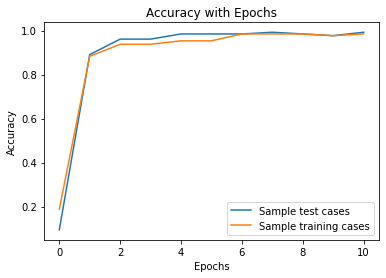

In [15]:
plt.plot(list1, label = 'Sample test cases')
plt.plot(list2, label = 'Sample training cases')
plt.xlabel("Epochs")
plt.legend()
plt.ylabel("Accuracy")
plt.title("Accuracy with Epochs")
plt.show()

In [16]:
with torch.no_grad():
  correct = 0
  total = 0
  for img, lab in test_set:
    img=img.reshape(-1,28,28).to(device)
    lab=lab.to(device)
    out = Digits(img)
    _, prediction = torch.max(out.data, dim=1)
    correct += (prediction==lab).sum().item()
    total += lab.size(0)
  print((1.0 * correct)/total)


0.9786
